(['#f3f2f2',
  '#dfd7da',
  '#f1cbaa',
  '#c86ee5',
  '#89e3f3',
  '#b8d9e7',
  '#e6aed9',
  '#9aa8e4'],
 array([[241.16364677, 203.67223356, 170.16934641],
        [137.57997954, 227.66695089, 243.63815533],
        [184.50992229, 217.9959521 , 231.02757366],
        [154.19215886, 168.45771965, 228.27575967],
        [200.42675294, 110.11053357, 229.60629044],
        [230.92805434, 174.93475476, 217.52618147],
        [243.06674974, 242.49970732, 242.88379961],
        [223.66376381, 215.97563259, 218.08102993]]),
 array([[200.42675294, 110.11053357, 229.60629044],
        [154.19215886, 168.45771965, 228.27575967],
        [230.92805434, 174.93475476, 217.52618147],
        [137.57997954, 227.66695089, 243.63815533],
        [241.16364677, 203.67223356, 170.16934641],
        [184.50992229, 217.9959521 , 231.02757366],
        [223.66376381, 215.97563259, 218.08102993],
        [243.06674974, 242.49970732, 242.88379961]]),
 array([[241.16364677, 203.67223356, 170.16934641],
       

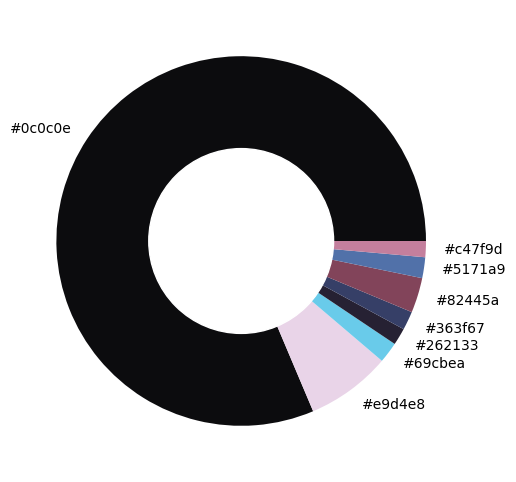

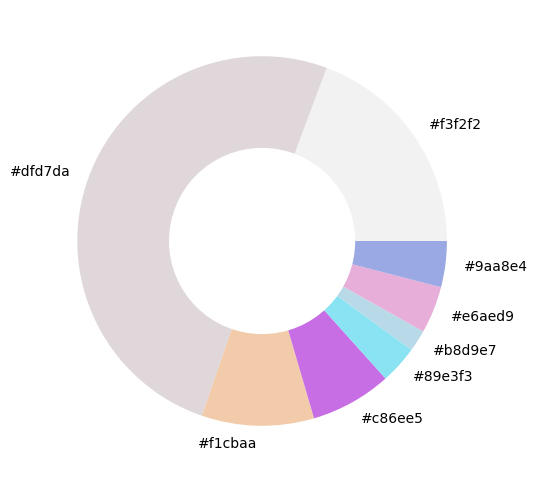

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from json import JSONEncoder
import cv2, json, math, codecs, numpy as np, colorsys

%matplotlib inline


def rgbToHex(color):
    """
   Converts RGB to HEX

   :param numpy.ndarray color: color that needs to be converted
   :return: HEX color code as string
   """
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_image(image_path):
    """
   Converts Image to RGB

   :param string image_path: path of the image
   :return: the image
   """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart, theme):
    """
   Finds and shows colors from an image in HEX and RGB

   :param numpy.ndarray image: image itself
   :param int number_of_colors: number of colors
   :param boolean show_chart: show chart
   :return: the HEX and RGB color codes
   """
    # resizing image to reduce run time
    modified_image = cv2.resize(
        image, (1000, 1000), interpolation=cv2.INTER_AREA)
    modified_image = modified_image.reshape(
        modified_image.shape[0]*modified_image.shape[1], 3)

    # KMeans algorithm creates clusters of colors
    colorCluster = KMeans(n_clusters=number_of_colors)
    labels = colorCluster.fit_predict(modified_image)

    # counting number of labels
    counts = Counter(labels)
    center_colors = colorCluster.cluster_centers_

    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgbToHex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    # showing pie chart
    my_circle=plt.Circle( (0,0), 0.5, color='white')
    if (show_chart):
        plt.figure(figsize=(8, 6))
        plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
        p=plt.gcf()
        p.gca().add_artist(my_circle)
                
    # Function for luminosity sorting
    def lum (r,g,b):
        return math.sqrt( .241 * r + .691 * g + .068 * b )
    rgb_colors_luminositySorted = np.array(sorted(rgb_colors, key=lambda rgb: lum(*rgb)))

    # HSV sorting
    rgb_colors_hsvSorted = np.array(sorted(rgb_colors, key=lambda rgb: colorsys.rgb_to_hsv(*rgb)))

    # Step sorting
    def step (r,g,b, repetitions=1):
        lum = math.sqrt( .241 * r + .691 * g + .068 * b )
        h, s, v = colorsys.rgb_to_hsv(r,g,b)
        h2 = int(h * repetitions)
        lum2 = int(lum * repetitions)
        v2 = int(v * repetitions)
        if h2 % 2 == 1:
            v2 = repetitions - v2
            lum = repetitions - lum
        return (h2, lum, v2)
    rgb_colors_stepSorted = np.array(sorted(rgb_colors, key=lambda rgb: step(rgb[0],rgb[1], rgb[2],8)))

    # encode numpy array into json
    class NumpyArrayEncoder(JSONEncoder):
        def default(self, obj):
            if isinstance(obj, np.ndarray):
                return obj.tolist()
            return JSONEncoder.default(self, obj)

    if theme=="dark":
        # saving the colors in a json file
        with open('colors-dark.json', 'w') as f:
            colorList = list(rgb_colors_hsvSorted)
            colorList.append(rgb_colors_luminositySorted[0])
            colorList.append(rgb_colors_luminositySorted[-1])
            json.dump(colorList, f,  cls=NumpyArrayEncoder)

        return hex_colors, rgb_colors_hsvSorted, rgb_colors_luminositySorted, rgb_colors_stepSorted

    else:
        # saving the colors in a json file
        with open('colors-light.json', 'w') as f:
            colorList = list(rgb_colors_hsvSorted)
            colorList.append(rgb_colors_luminositySorted[0])
            colorList.append(rgb_colors_luminositySorted[-1])
            json.dump(colorList, f,  cls=NumpyArrayEncoder)

        return hex_colors, rgb_colors_hsvSorted, rgb_colors_luminositySorted, rgb_colors_stepSorted

get_colors(get_image('../assets/img/backgroundImage-dark.webp'), 8, True, "dark")
get_colors(get_image('../assets/img/backgroundImage-light.webp'), 8, True, "light")
